In [ ]:
# default_exp drawings

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from IPython.display import Image
#from IPython.core.display import HTML 
from IPython.display import HTML

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# import the Python Image processing Library
from PIL import Image as PILImage

# Makes it possible to do symbolic maths and use a control system lib
import sympy
sympy.init_printing()

# Let's also ignore some warnings here due to sympy using an old matplotlib function to render Latex equations.
import warnings
warnings.filterwarnings('ignore')

# For animations
from matplotlib import animation, rc

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

# Enable interactive plot
#%matplotlib notebook

In [ ]:
%matplotlib inline

In [ ]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

## Requires latex to be installed! This is not the usual jupyter notebook install, it is the proper version
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["Helvetica"]})

# # for Palatino and other serif fonts use:
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": ["Palatino"],
# })

rc('font', **font)

In [ ]:
plt.xkcd()  # Yes...

-----------------------

# Drawings

## Draw angles

From [ArmNavigation](https://github.com/AtsushiSakai/PythonRobotics/blob/master/ArmNavigation/two_joint_arm_to_point_control/Planar_Two_Link_IK.ipynb)

In [ ]:
def transform_points(points, theta, origin):
    T = np.array([[np.cos(theta), -np.sin(theta), origin[0]],
                  [np.sin(theta), np.cos(theta), origin[1]],
                  [0, 0, 1]])
    return np.matmul(T, np.array(points))

def draw_angle(angle, offset=0, origin=[0, 0], r=0.5, n_points=100):
        x_start = r*np.cos(angle)
        x_end = r
        dx = (x_end - x_start)/(n_points-1)
        coords = [[0 for _ in range(n_points)] for _ in range(3)]
        x = x_start
        for i in range(n_points-1):
            y = np.sqrt(r**2 - x**2)
            coords[0][i] = x
            coords[1][i] = y
            coords[2][i] = 1
            x += dx
        coords[0][-1] = r
        coords[2][-1] = 1
        coords = transform_points(coords, offset, origin)
        plt.plot(coords[0], coords[1], 'k-')

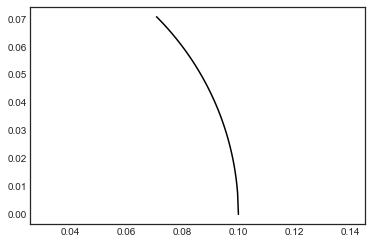

In [ ]:
draw_angle(angle=np.radians(45), offset=0, origin=[0, 0], r=0.1)

plt.axis("equal")
plt.show()

## Draw a complex number on the Argand diagram

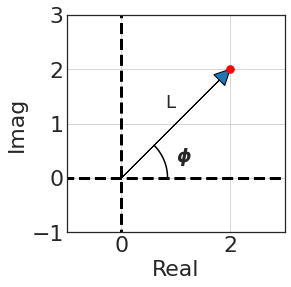

In [ ]:
fig = plt.figure()


def plot_complex(real, img):      
    plt.arrow(0, 0, real, img, length_includes_head=True, head_width=np.linalg.norm([real, img])*0.1, head_length=np.linalg.norm([real, img])*0.1)
    plt.plot(real, img, color='red', marker='.', markersize=15)
    plt.plot([-real*10, real*10], [0, 0], color='black', linewidth=3, linestyle='--')
    plt.plot([0, 0], [-img*10, img*10], color='black', linewidth=3, linestyle='--')
    draw_angle(angle=np.arctan2(img, real), offset=0, origin=[0, 0], r=np.linalg.norm([real, img])*0.3)

    plt.xlabel('Real')
    plt.ylabel('Imag')
    plt.text(real/2-0.2, img/2+0.3, 'L', fontsize='small', fontweight='normal')
    plt.text(1, 0.3, '$\phi$', fontsize='small', fontweight='normal')

        
plot_complex(2, 2)

plt.axis([-1, 3, -1, 3])
plt.grid()
fig.gca().set_aspect('equal', 'box')

plt.savefig('img/37.H_jw.png', bbox_inches='tight')

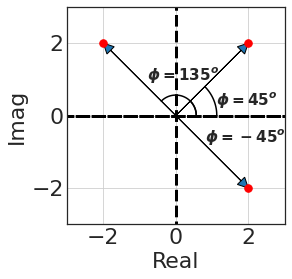

In [ ]:
fig = plt.figure()


def plot_complex(real, img, length):      
    plt.arrow(0, 0, real, img, length_includes_head=True, head_width=np.linalg.norm([real, img])*0.1, head_length=np.linalg.norm([real, img])*0.1)
    plt.plot(real, img, color='red', marker='.', markersize=15)
    plt.plot([-real*10, real*10], [0, 0], color='black', linewidth=3, linestyle='--')
    plt.plot([0, 0], [-img*10, img*10], color='black', linewidth=3, linestyle='--')
    draw_angle(angle=np.arctan2(img, real), offset=0, origin=[0, 0], r=length)

    plt.xlabel('Real')
    plt.ylabel('Imag')    
        
        

real, img = 2, 2
plot_complex(real, img, np.linalg.norm([real, img])*0.4)
plt.text(1.1, 0.3, '$\phi={:.0f}^o$'.format(np.degrees(np.arctan2(img, real))), fontsize='x-small', fontweight='normal')

real, img = -2, 2
plot_complex(real, img, np.linalg.norm([real, img])*0.2)
plt.text(-0.8, 1, '$\phi={:.0f}^o$'.format(np.degrees(np.arctan2(img, real))), fontsize='x-small', fontweight='normal')

real, img = 2, -2
plot_complex(real, img, np.linalg.norm([real, img])*0.2)
plt.text(0.8, -0.7, '$\phi={:.0f}^o$'.format(np.degrees(np.arctan2(img, real))), fontsize='x-small', fontweight='normal')


plt.axis([-3, 3, -3, 3])
plt.grid()
fig.gca().set_aspect('equal', 'box')

plt.savefig('img/38.H_jw_multiple_points.png', bbox_inches='tight')

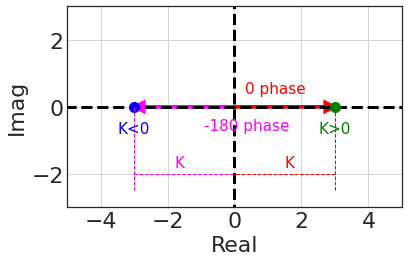

In [ ]:
fig = plt.figure()


def plot_K(real, img, length):          
    plt.plot(real, img, color='red', marker='.', markersize=15)
    plt.plot([-real*10, real*10], [0, 0], color='black', linewidth=3, linestyle='--')
    plt.plot([0, 0], [-10, 10], color='black', linewidth=3, linestyle='--')
    #plt.arrow(0, 0, real, img, length_includes_head=True, head_width=np.linalg.norm([real, img])*0.1, head_length=np.linalg.norm([real, img])*0.1, color='red', linewidth=4)    
    #draw_angle(angle=np.arctan2(img, real), offset=0, origin=[0, 0], r=length)

        
        
# Axis
plt.plot([-real*10, real*10], [0, 0], color='black', linewidth=3, linestyle='--')
plt.plot([0, 0], [-10, 10], color='black', linewidth=3, linestyle='--')

# K>0
real, img = 3, 0
plt.plot(real, img, color='green', marker='.', markersize=20)
plt.text(real-0.5, -0.8, 'K>0', fontsize='x-small', fontweight='normal', color='green')
plt.arrow(0, 0, real, img, length_includes_head=True, head_width=np.linalg.norm([real, img])*0.1, head_length=np.linalg.norm([real, img])*0.1, color='red', linewidth=3)    

plt.plot([real, real], [0, -2.5], linestyle='--', linewidth=1, color='red') # vertical line
plt.plot([real, 0], [-2, -2], linestyle='--', linewidth=1, color='red')     # horizontal line
plt.text(1.5, -1.8, 'K', fontsize='x-small', fontweight='normal', color='red')
plt.text(0.3, +0.4, '0 phase', fontsize='x-small', fontweight='normal', color='red')




# K<0
real, img = -3, 0
plt.plot(real, img, color='blue', marker='.', markersize=20)
plt.text(real-0.5, -0.8, 'K<0', fontsize='x-small', fontweight='normal', color='blue')
plt.arrow(0, 0, real, img, length_includes_head=True, head_width=np.linalg.norm([real, img])*0.1, head_length=np.linalg.norm([real, img])*0.1, color='magenta', linewidth=3)    

plt.plot([real, real], [0, -2.5], linestyle='--', linewidth=1, color='magenta')# vertical line
plt.plot([real, 0], [-2, -2], linestyle='--', linewidth=1, color='magenta') # horizontal line
plt.text(-1.8, -1.8, 'K', fontsize='x-small', fontweight='normal', color='magenta')
#draw_angle(angle=np.arctan2(img, real), offset=0, origin=[0, 0], r=0.5)
plt.text(-0.9, -0.7, '-180 phase', fontsize='x-small', fontweight='normal', color='magenta')





plt.xlabel('Real')
plt.ylabel('Imag')    
    
plt.axis([-5, 5, -3, 3])
plt.grid()
fig.gca().set_aspect('equal', 'box')

plt.savefig('img/39.H_jw_K.png', bbox_inches='tight')

In [ ]:
K = 1
if K:
    phi = 0
else:
    phi = -180

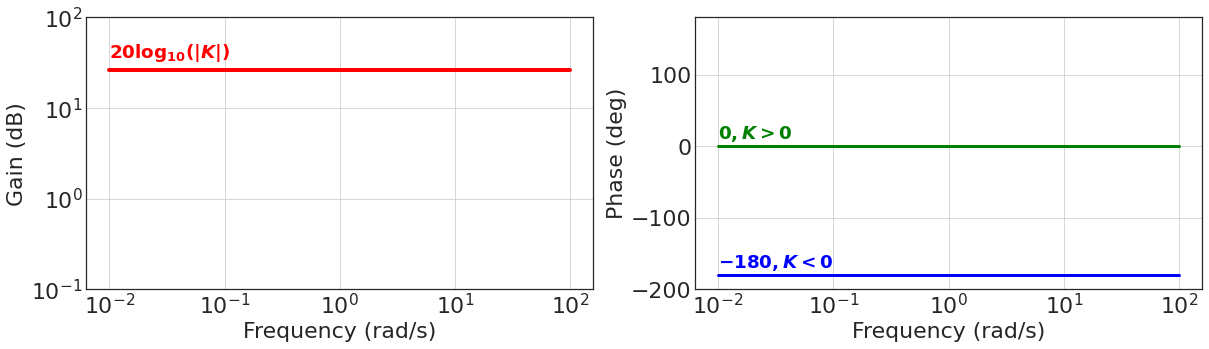

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20,5));

ws = np.logspace(-2, 2, 100) # logspace sets the exponents

gain, phase_pos, phase_neg = [], [], []

K=10
for w in ws:
    gain.append(20*np.log10(np.abs(K)))    
    phase_pos.append(0)
    phase_neg.append(-180)
    
    
# Gain
axs[0].plot(ws, 20*np.log10(gain), linewidth=4, color='red')
axs[0].text( 0.01, 20*np.log10(gain[0])+10, '$20\log_{10}(|K|)$', fontsize='small', fontweight='normal', color='red')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylim((0.1, 100))
axs[0].grid('log')
axs[0].set_xlabel('Frequency (rad/s)')
axs[0].set_ylabel('Gain (dB)');

# Phase
axs[1].plot(ws, phase_pos, linewidth=3, color='green')
axs[1].plot(ws, phase_neg, linewidth=3, color='blue')

axs[1].text( 0.01, 10, '$0, K>0$', fontsize='small', fontweight='normal', color='green')
axs[1].text( 0.01, -170, '$-180, K<0$', fontsize='small', fontweight='normal', color='blue')


axs[1].set_xscale('log')
axs[1].set_ylim((-200, 180))
axs[1].grid('log')
axs[1].set_xlabel('Frequency (rad/s)')
axs[1].set_ylabel('Phase (deg)');

#fig.gca().set_aspect('equal', 'box')

plt.savefig('img/40.Bode_H_jw_K.png', bbox_inches='tight')

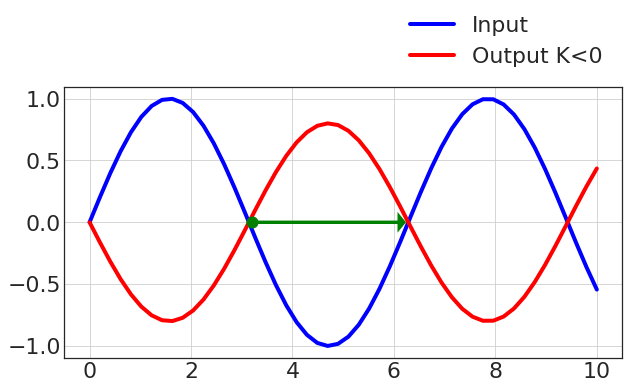

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(10,5));

x = np.linspace(0, 10, 50)
plt.plot(x, np.sin(x), color='blue', linewidth=4, label="Input")
plt.plot(x, -0.8*np.sin(x), color='red', linewidth=4, label="Output K<0")
plt.plot(3.2, 0, marker='.', color='green', markersize=22)
plt.arrow(3.2, 0, 3, 0, length_includes_head=True, head_width=0.1, head_length=0.1, color='green', linewidth=3)    

#plt.gca().legend(loc="center right", bbox_to_anchor=(8,0.5)) # loc=["upper left", "lower left", "center right"]
plt.legend(loc="lower right", bbox_to_anchor=(1,1))
plt.grid()

plt.savefig('img/42sinwt_shift', bbox_inches='tight')

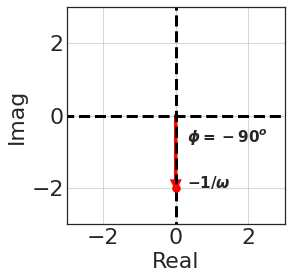

In [ ]:
fig = plt.figure()


def plot_complex(real, img, length):      
    
    plt.plot([-10, 10], [0, 0], color='black', linewidth=3, linestyle='--')
    plt.plot([0, 0], [-img*10, img*10], color='black', linewidth=3, linestyle='--')
    
    plt.plot(real, img, color='red', marker='.', markersize=15)
    
    plt.arrow(0, 0, real, img, length_includes_head=True, 
              head_width=np.linalg.norm([real, img])*0.1, 
              head_length=np.linalg.norm([real, img])*0.1,
              color = 'red',
              linewidth=3
             )
    plt.xlabel('Real')
    plt.ylabel('Imag')    
        
w = 0.5

real, img = 0, -1/w
plot_complex(real, img, np.linalg.norm([real, img])*0.2)
plt.text(0.3, -0.7, '$\phi={:.0f}^o$'.format(np.degrees(np.arctan2(img, real))), fontsize='x-small', fontweight='normal')
plt.text(0.3, -2, '$-1/\omega$', fontsize='x-small', fontweight='normal')


#draw_angle(angle=np.arctan2(img, real), offset=0, origin=[0, 0], r=length)



plt.axis([-3, 3, -3, 3])
plt.grid()
fig.gca().set_aspect('equal', 'box')

plt.savefig('img/43.H_jw_integrator_bode.png', bbox_inches='tight')

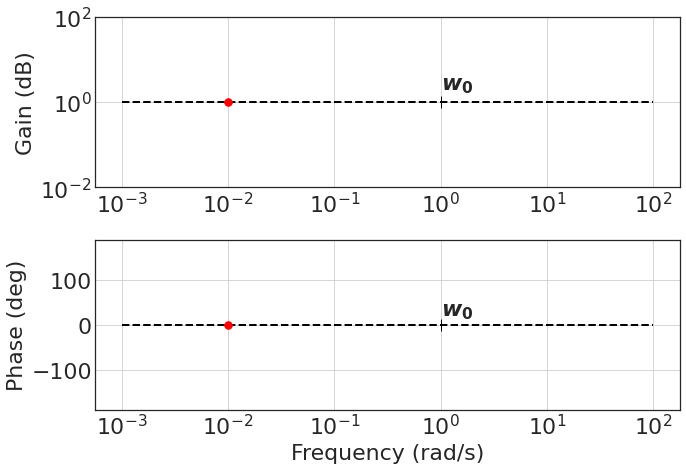

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 7))
ws = np.logspace(-3,2,50)

w_0 = 1

# w-axis
axs[0].loglog(ws, np.ones((len(ws),1)), color='black', linestyle='--', linewidth=2)
axs[1].plot(ws, np.zeros((len(ws),1)), color='black', linestyle='--', linewidth=2)

# plot w_0
axs[0].loglog(w_0, 1, color='black', marker='|', markersize=12)
axs[0].text(w_0, 2, '$w_0$')
axs[1].plot(w_0, 0, color='black', marker='|', markersize=12)
axs[1].text(w_0, 20, '$w_0$')

# plot points
axs[0].loglog(1e-2, 1, color='red', marker='.', markersize=15)
axs[1].plot(1e-2, 0, color='red', marker='.', markersize=15)



axs[1].set_xscale('log')

axs[0].set_ylim(0.01, 100)
axs[1].set_ylim(-190, 190)
axs[0].grid('log')
axs[1].grid('log')
axs[0].set_ylabel('Gain (dB)')
axs[1].set_ylabel('Phase (deg)')
plt.xlabel('Frequency (rad/s)')


fig.tight_layout()
plt.savefig('img/45.H_jw_real_pole_bode_1.png', bbox_inches='tight')

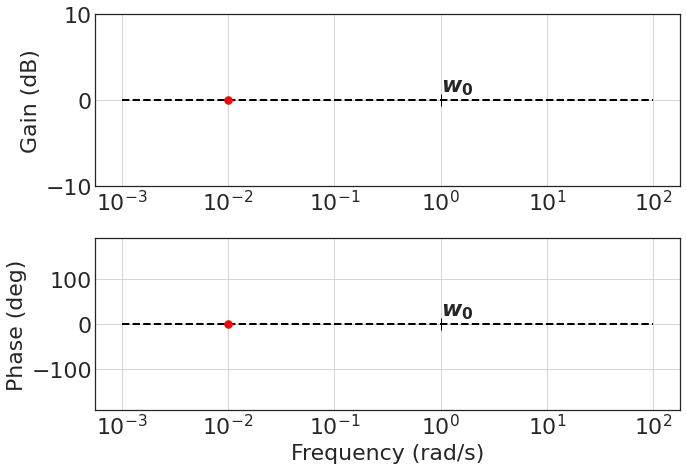

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 7))
ws = np.logspace(-3,2,50)

w_0 = 1

# w-axis
axs[0].plot(ws, np.zeros((len(ws),1)), color='black', linestyle='--', linewidth=2)
axs[1].plot(ws, np.zeros((len(ws),1)), color='black', linestyle='--', linewidth=2)

# plot w_0
axs[0].plot(w_0, 20*np.log10(1), color='black', marker='|', markersize=12)
axs[0].text(w_0, 1, '$w_0$')
axs[1].plot(w_0, 0, color='black', marker='|', markersize=12)
axs[1].text(w_0, 20, '$w_0$')

# plot points
axs[0].plot(1e-2, 20*np.log10(1), color='red', marker='.', markersize=15)
axs[1].plot(1e-2, 0, color='red', marker='.', markersize=15)


axs[0].set_xscale('log')
axs[1].set_xscale('log')

axs[0].set_ylim(-10, 10)
axs[1].set_ylim(-190, 190)
axs[0].grid('log')
axs[1].grid('log')
axs[0].set_ylabel('Gain (dB)')
axs[1].set_ylabel('Phase (deg)')
plt.xlabel('Frequency (rad/s)')


fig.tight_layout()
plt.savefig('img/45.H_jw_real_pole_bode_0.png', bbox_inches='tight')

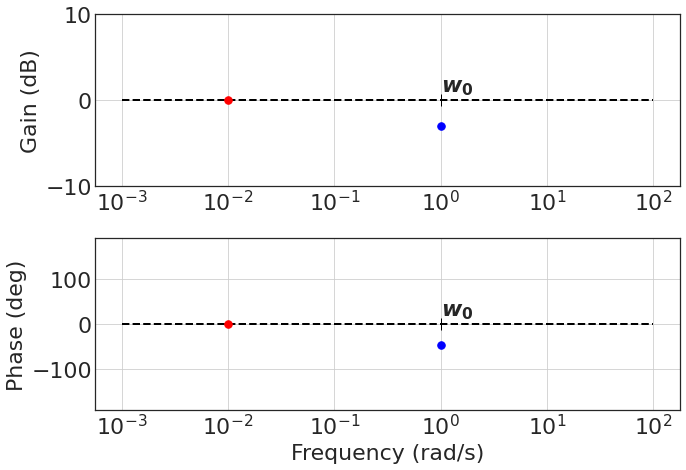

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 7))
ws = np.logspace(-3,2,50)

w_0 = 1

# w-axis
axs[0].plot(ws, np.zeros((len(ws),1)), color='black', linestyle='--', linewidth=2)
axs[1].plot(ws, np.zeros((len(ws),1)), color='black', linestyle='--', linewidth=2)

# plot w_0
axs[0].plot(w_0, 20*np.log10(1), color='black', marker='|', markersize=12)
axs[0].text(w_0, 1, '$w_0$')
axs[1].plot(w_0, 0, color='black', marker='|', markersize=12)
axs[1].text(w_0, 20, '$w_0$')

# plot points
# w << w_0
axs[0].plot(1e-2, 20*np.log10(1), color='red', marker='.', markersize=15)
axs[1].plot(1e-2, 0, color='red', marker='.', markersize=15)



# w = w_0
axs[0].plot(w_0, -20*np.log10(np.sqrt(2)), color='blue', marker='.', markersize=15) # gain
axs[1].plot(w_0, -45, color='blue', marker='.', markersize=15) # phase
  


axs[0].set_xscale('log')
axs[1].set_xscale('log')

axs[0].set_ylim(-10, 10)
axs[1].set_ylim(-190, 190)
axs[0].grid('log')
axs[1].grid('log')
axs[0].set_ylabel('Gain (dB)')
axs[1].set_ylabel('Phase (deg)')
plt.xlabel('Frequency (rad/s)')


fig.tight_layout()
plt.savefig('img/46.H_jw_real_pole_bode_1_1.png', bbox_inches='tight')

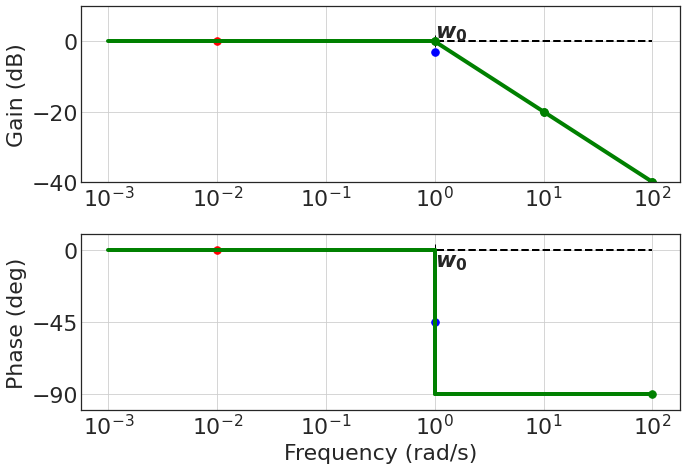

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 7))
ws = np.logspace(-3,2,50)

w_0 = 1

# w-axis
axs[0].plot(ws, np.zeros((len(ws),1)), color='black', linestyle='--', linewidth=2)
axs[1].plot(ws, np.zeros((len(ws),1)), color='black', linestyle='--', linewidth=2)

# plot w_0
axs[0].plot(w_0, 20*np.log10(1), color='black', marker='|', markersize=12)
axs[0].text(w_0, 1, '$w_0$')
axs[1].plot(w_0, 0, color='black', marker='|', markersize=12)
axs[1].text(w_0, -10, '$w_0$')

# plot points
# w << w_0
axs[0].plot(1e-2, 20*np.log10(1), color='red', marker='.', markersize=15)
axs[1].plot(1e-2, 0, color='red', marker='.', markersize=15)

# w = w_0
axs[0].plot(w_0, -20*np.log10(np.sqrt(2)), color='blue', marker='.', markersize=15) # gain
axs[1].plot(w_0, -45, color='blue', marker='.', markersize=15) # phase
    
# w >> w_0
axs[0].plot([w_0, 10*w_0, 100*w_0], [-20*np.log10(1), -20*np.log10(10), -20*np.log10(100)], color='green', marker='.', markersize=15) # gain
axs[1].plot(100*w_0, -90, color='green', marker='.', markersize=15) # phase


# asymptotic plot
axs[0].plot([w_0, 10*w_0, 100*w_0], [-20*np.log10(1), -20*np.log10(10), -20*np.log10(100)], color='green', marker='.', markersize=15, linewidth=4) # gain
axs[0].plot([1e-3, w_0], [-20*np.log10(1), -20*np.log10(1)], color='green', marker='', markersize=15, linewidth=4) # gain

axs[1].plot([1e-3, w_0], [0, 0], color='green', marker='', markersize=15, linewidth=4) # phase
axs[1].plot([w_0, 100*w_0], [-90, -90], color='green', marker='', markersize=15, linewidth=4) # phase
axs[1].plot([w_0, w_0], [0, -90], color='green', marker='', markersize=15, linewidth=4) # phase


axs[0].set_xscale('log')
axs[1].set_xscale('log')

axs[0].set_ylim(-40, 10)
axs[1].set_ylim(-100, 10)
axs[1].set_yticks([0, -45, -90])
axs[0].grid('log')
axs[1].grid('log')
axs[0].set_ylabel('Gain (dB)')
axs[1].set_ylabel('Phase (deg)')
plt.xlabel('Frequency (rad/s)')


fig.tight_layout()
plt.savefig('img/47.H_jw_real_pole_bode_2.png', bbox_inches='tight')

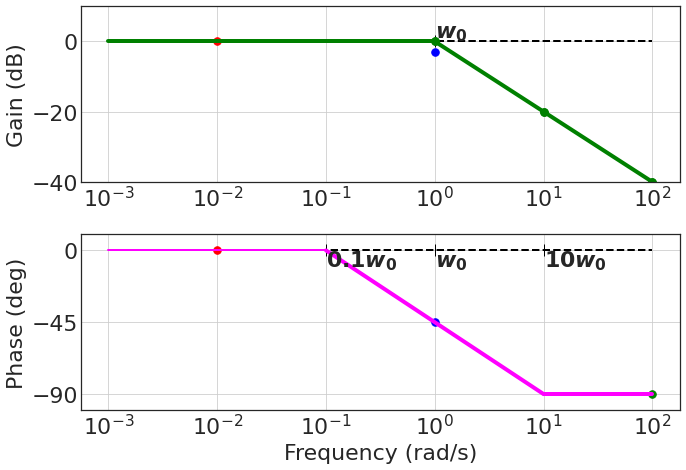

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 7))
ws = np.logspace(-3,2,50)

w_0 = 1

# w-axis
axs[0].plot(ws, np.zeros((len(ws),1)), color='black', linestyle='--', linewidth=2)
axs[1].plot(ws, np.zeros((len(ws),1)), color='black', linestyle='--', linewidth=2)

# plot w_0
axs[0].plot(w_0, 20*np.log10(1), color='black', marker='|', markersize=12)
axs[0].text(w_0, 1, '$w_0$')
axs[1].plot(w_0, 0, color='black', marker='|', markersize=12)
axs[1].text(w_0, -10, '$w_0$')


axs[1].plot(0.1*w_0, 0, color='black', marker='|', markersize=12)
axs[1].text(0.1*w_0, -10, '$0.1 w_0$')

axs[1].plot(10*w_0, 0, color='black', marker='|', markersize=12)
axs[1].text(10*w_0, -10, '$10 w_0$')




# plot points
# w << w_0
axs[0].plot(1e-2, 20*np.log10(1), color='red', marker='.', markersize=15)
axs[1].plot(1e-2, 0, color='red', marker='.', markersize=15)

# w = w_0
axs[0].plot(w_0, -20*np.log10(np.sqrt(2)), color='blue', marker='.', markersize=15) # gain
axs[1].plot(w_0, -45, color='blue', marker='.', markersize=15) # phase
    
# w >> w_0
axs[0].plot([w_0, 10*w_0, 100*w_0], [-20*np.log10(1), -20*np.log10(10), -20*np.log10(100)], color='green', marker='.', markersize=15) # gain
axs[1].plot(100*w_0, -90, color='green', marker='.', markersize=15) # phase


# asymptotic plot
axs[0].plot([w_0, 10*w_0, 100*w_0], [-20*np.log10(1), -20*np.log10(10), -20*np.log10(100)], color='green', marker='.', markersize=15, linewidth=4) # gain
axs[0].plot([1e-3, w_0], [-20*np.log10(1), -20*np.log10(1)], color='green', marker='', markersize=15, linewidth=4) # gain

# axs[1].plot([1e-3, w_0], [0, 0], color='green', marker='', markersize=15, linewidth=4) # phase
# axs[1].plot([w_0, 100*w_0], [-90, -90], color='green', marker='', markersize=15, linewidth=4) # phase
# axs[1].plot([w_0, w_0], [0, -90], color='green', marker='', markersize=15, linewidth=4) # phase

# better approximation of the phase
axs[1].plot([1e-3, 0.1*w_0], [0, 0], color='magenta', marker='', markersize=15, linewidth=2) # phase
axs[1].plot([10*w_0, 100*w_0], [-90, -90], color='magenta', marker='', markersize=15, linewidth=4) # phase
axs[1].plot([0.1*w_0, 10*w_0], [0, -90], color='magenta', marker='', markersize=15, linewidth=4) # phase






axs[0].set_xscale('log')
axs[1].set_xscale('log')

axs[0].set_ylim(-40, 10)
axs[1].set_ylim(-100, 10)
axs[1].set_yticks([0, -45, -90])
axs[0].grid('log')
axs[1].grid('log')
axs[0].set_ylabel('Gain (dB)')
axs[1].set_ylabel('Phase (deg)')
plt.xlabel('Frequency (rad/s)')


fig.tight_layout()
plt.savefig('img/47.H_jw_real_pole_bode_2_v2.png', bbox_inches='tight')

Complex poles Bode plot

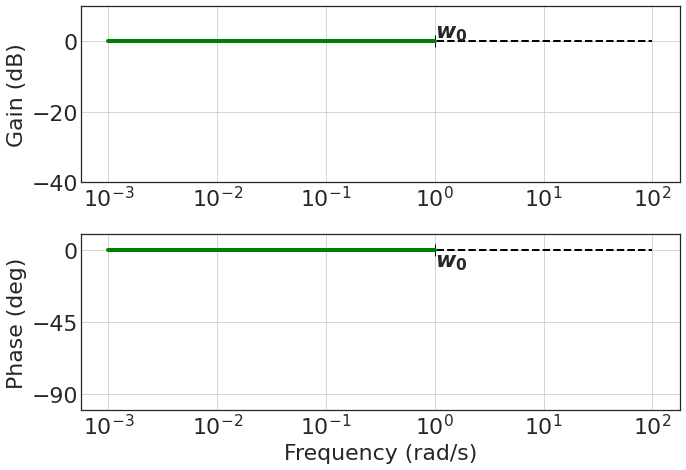

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 7))
ws = np.logspace(-3,2,50)

w_0 = 1

# w-axis
axs[0].plot(ws, np.zeros((len(ws),1)), color='black', linestyle='--', linewidth=2)
axs[1].plot(ws, np.zeros((len(ws),1)), color='black', linestyle='--', linewidth=2)

# plot w_0
axs[0].plot(w_0, 20*np.log10(1), color='black', marker='|', markersize=12)
axs[0].text(w_0, 1, '$w_0$')
axs[1].plot(w_0, 0, color='black', marker='|', markersize=12)
axs[1].text(w_0, -10, '$w_0$')


# axs[1].plot(0.1*w_0, 0, color='black', marker='|', markersize=12)
# axs[1].text(0.1*w_0, -10, '$0.1 w_0$')

# axs[1].plot(10*w_0, 0, color='black', marker='|', markersize=12)
# axs[1].text(10*w_0, -10, '$10 w_0$')



# plot points
# w << w_0
# axs[0].plot(1e-2, 20*np.log10(1), color='red', marker='.', markersize=15)
# axs[1].plot(1e-2, 0, color='red', marker='.', markersize=15)

# w = w_0
# axs[0].plot(w_0, -20*np.log10(np.sqrt(2)), color='blue', marker='.', markersize=15) # gain
# axs[1].plot(w_0, -45, color='blue', marker='.', markersize=15) # phase
    
# w >> w_0
# axs[0].plot([w_0, 10*w_0, 100*w_0], [-20*np.log10(1), -20*np.log10(10), -20*np.log10(100)], color='green', marker='.', markersize=15) # gain
# axs[1].plot(100*w_0, -90, color='green', marker='.', markersize=15) # phase


# asymptotic plot
axs[0].plot([1e-3, w_0], [-20*np.log10(1), -20*np.log10(1)], color='green', marker='', markersize=15, linewidth=4) # gain
#axs[0].plot([w_0, 10*w_0, 100*w_0], [-20*np.log10(1), -20*np.log10(10), -20*np.log10(100)], color='green', marker='.', markersize=15, linewidth=4) # gain


axs[1].plot([1e-3, w_0], [0, 0], color='green', marker='', markersize=15, linewidth=4) # phase
# axs[1].plot([w_0, 100*w_0], [-90, -90], color='green', marker='', markersize=15, linewidth=4) # phase
# axs[1].plot([w_0, w_0], [0, -90], color='green', marker='', markersize=15, linewidth=4) # phase

# better approximation of the phase
# axs[1].plot([1e-3, 0.1*w_0], [0, 0], color='magenta', marker='', markersize=15, linewidth=2) # phase
# axs[1].plot([10*w_0, 100*w_0], [-90, -90], color='magenta', marker='', markersize=15, linewidth=4) # phase
# axs[1].plot([0.1*w_0, 10*w_0], [0, -90], color='magenta', marker='', markersize=15, linewidth=4) # phase






axs[0].set_xscale('log')
axs[1].set_xscale('log')

axs[0].set_ylim(-40, 10)
axs[1].set_ylim(-100, 10)
axs[1].set_yticks([0, -45, -90])
axs[0].grid('log')
axs[1].grid('log')
axs[0].set_ylabel('Gain (dB)')
axs[1].set_ylabel('Phase (deg)')
plt.xlabel('Frequency (rad/s)')


fig.tight_layout()
plt.savefig('img/50.H_jw_complex_pole_bode_1.png', bbox_inches='tight')

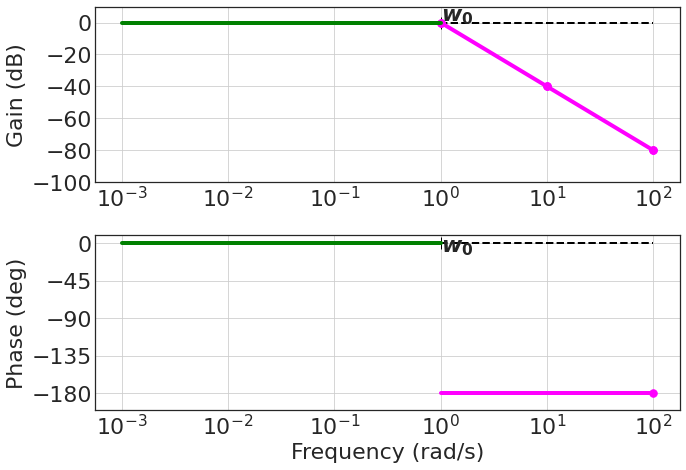

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 7))
ws = np.logspace(-3,2,50)

w_0 = 1

# w-axis
axs[0].plot(ws, np.zeros((len(ws),1)), color='black', linestyle='--', linewidth=2)
axs[1].plot(ws, np.zeros((len(ws),1)), color='black', linestyle='--', linewidth=2)

# plot w_0
axs[0].plot(w_0, 20*np.log10(1), color='black', marker='|', markersize=12)
axs[0].text(w_0, 1, '$w_0$')
axs[1].plot(w_0, 0, color='black', marker='|', markersize=12)
axs[1].text(w_0, -10, '$w_0$')


# axs[1].plot(0.1*w_0, 0, color='black', marker='|', markersize=12)
# axs[1].text(0.1*w_0, -10, '$0.1 w_0$')

# axs[1].plot(10*w_0, 0, color='black', marker='|', markersize=12)
# axs[1].text(10*w_0, -10, '$10 w_0$')




# plot points
# w << w_0
# axs[0].plot(1e-2, 20*np.log10(1), color='red', marker='.', markersize=15)
# axs[1].plot(1e-2, 0, color='red', marker='.', markersize=15)

# w = w_0
# axs[0].plot(w_0, -20*np.log10(np.sqrt(2)), color='blue', marker='.', markersize=15) # gain
# axs[1].plot(w_0, -45, color='blue', marker='.', markersize=15) # phase
    
# w >> w_0
axs[0].plot([w_0, 10*w_0, 100*w_0], [-40*np.log10(1), -40*np.log10(10), -40*np.log10(100)], color='magenta', marker='.', markersize=15) # gain
axs[1].plot(100*w_0, -180, color='magenta', marker='.', markersize=15) # phase


# asymptotic plot
axs[0].plot([w_0, 10*w_0, 100*w_0], [-40*np.log10(1), -40*np.log10(10), -40*np.log10(100)], color='magenta', marker='.', markersize=15, linewidth=4) # gain
axs[0].plot([1e-3, w_0], [-40*np.log10(1), -40*np.log10(1)], color='green', marker='', markersize=15, linewidth=4) # gain

axs[1].plot([1e-3, w_0], [0, 0], color='green', marker='', markersize=15, linewidth=4) # phase
axs[1].plot([w_0, 100*w_0], [-180, -180], color='magenta', marker='', markersize=15, linewidth=4) # phase
#axs[1].plot([w_0, w_0], [0, -180], color='green', marker='', markersize=15, linewidth=4) # phase

# better approximation of the phase
# axs[1].plot([1e-3, 0.1*w_0], [0, 0], color='magenta', marker='', markersize=15, linewidth=2) # phase
# axs[1].plot([10*w_0, 100*w_0], [-180, -180], color='magenta', marker='', markersize=15, linewidth=4) # phase
# axs[1].plot([0.1*w_0, 10*w_0], [0, -180], color='magenta', marker='', markersize=15, linewidth=4) # phase




axs[0].set_xscale('log')
axs[1].set_xscale('log')

axs[0].set_ylim(-100, 10)
axs[1].set_ylim(-200, 10)
axs[0].set_yticks([0, -20, -40, -60, -80, -100])
axs[1].set_yticks([0, -45, -90,-135,-180])
axs[0].grid('log')
axs[1].grid('log')
axs[0].set_ylabel('Gain (dB)')
axs[1].set_ylabel('Phase (deg)')
plt.xlabel('Frequency (rad/s)')


fig.tight_layout()
plt.savefig('img/51.H_jw_complex_pole_bode_w_gg_w0_1.png', bbox_inches='tight')

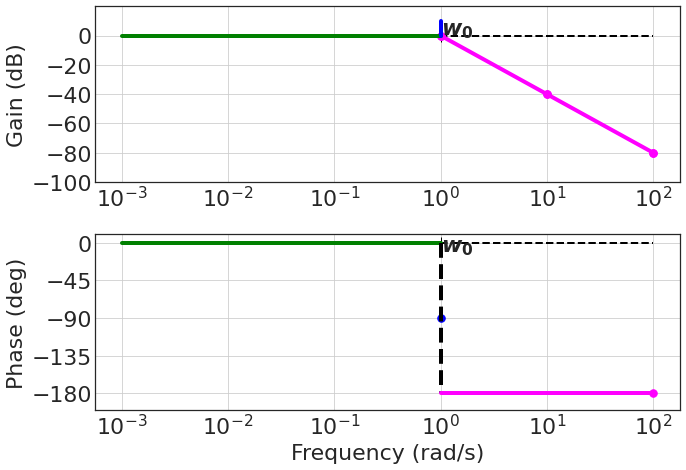

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 7))
ws = np.logspace(-3,2,50)

w_0 = 1

# w-axis
axs[0].plot(ws, np.zeros((len(ws),1)), color='black', linestyle='--', linewidth=2)
axs[1].plot(ws, np.zeros((len(ws),1)), color='black', linestyle='--', linewidth=2)

# plot w_0
axs[0].plot(w_0, 20*np.log10(1), color='black', marker='|', markersize=12)
axs[0].text(w_0, 1, '$w_0$')
axs[1].plot(w_0, 0, color='black', marker='|', markersize=12)
axs[1].text(w_0, -10, '$w_0$')


# axs[1].plot(0.1*w_0, 0, color='black', marker='|', markersize=12)
# axs[1].text(0.1*w_0, -10, '$0.1 w_0$')

# axs[1].plot(10*w_0, 0, color='black', marker='|', markersize=12)
# axs[1].text(10*w_0, -10, '$10 w_0$')




# plot points
# w << w_0
# axs[0].plot(1e-2, 20*np.log10(1), color='red', marker='.', markersize=15)
# axs[1].plot(1e-2, 0, color='red', marker='.', markersize=15)

# w = w_0
#axs[0].plot(w_0, -20*np.log10(np.sqrt(2)), color='blue', marker='.', markersize=15) # gain
axs[1].plot(w_0, -90, color='blue', marker='.', markersize=15) # phase
    
# w >> w_0
axs[0].plot([w_0, 10*w_0, 100*w_0], [-40*np.log10(1), -40*np.log10(10), -40*np.log10(100)], color='magenta', marker='.', markersize=15) # gain
axs[1].plot(100*w_0, -180, color='magenta', marker='.', markersize=15) # phase


# asymptotic plot
axs[0].plot([w_0, 10*w_0, 100*w_0], [-40*np.log10(1), -40*np.log10(10), -40*np.log10(100)], color='magenta', marker='.', markersize=15, linewidth=4) # gain
axs[0].plot([1e-3, w_0], [-40*np.log10(1), -40*np.log10(1)], color='green', marker='', markersize=15, linewidth=4) # gain

axs[1].plot([1e-3, w_0], [0, 0], color='green', marker='', markersize=15, linewidth=4) # phase
axs[1].plot([w_0, w_0], [-0, -180], color='black', marker='', markersize=15, linewidth=4, linestyle='--') # phase
axs[1].plot([w_0, 100*w_0], [-180, -180], color='magenta', marker='', markersize=15, linewidth=4) # phase

axs[0].plot([w_0, w_0], [0, 10], color='blue', markersize=15, linewidth=4) # gain


#axs[1].plot([w_0, w_0], [0, -180], color='green', marker='', markersize=15, linewidth=4) # phase

# better approximation of the phase
# axs[1].plot([1e-3, 0.1*w_0], [0, 0], color='magenta', marker='', markersize=15, linewidth=2) # phase
# axs[1].plot([10*w_0, 100*w_0], [-180, -180], color='magenta', marker='', markersize=15, linewidth=4) # phase
# axs[1].plot([0.1*w_0, 10*w_0], [0, -180], color='magenta', marker='', markersize=15, linewidth=4) # phase




axs[0].set_xscale('log')
axs[1].set_xscale('log')

axs[0].set_ylim(-100, 20)
axs[1].set_ylim(-200, 10)
axs[0].set_yticks([0, -20, -40, -60, -80, -100])
axs[1].set_yticks([0, -45, -90,-135,-180])
axs[0].grid('log')
axs[1].grid('log')
axs[0].set_ylabel('Gain (dB)')
axs[1].set_ylabel('Phase (deg)')
plt.xlabel('Frequency (rad/s)')


fig.tight_layout()
plt.savefig('img/52.H_jw_complex_pole_bode_w_eq_w0_1.png', bbox_inches='tight')

# Final values

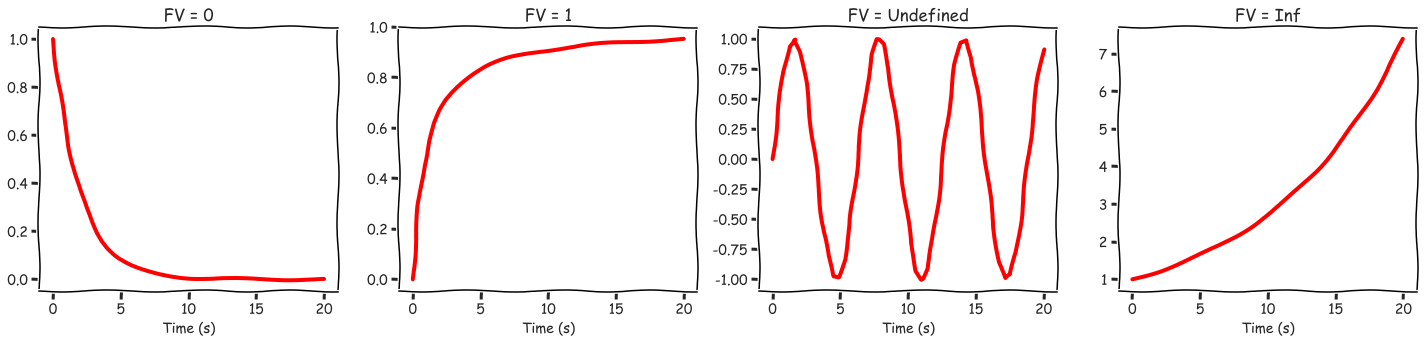

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

t = np.linspace(0, 20, 50)

axs[0].plot(t, np.exp(-.5*t), color='red', linewidth=4)
axs[0].set_xlabel('Time (s)')
axs[0].set_title('FV = 0')
axs[0].grid()

axs[1].plot(t, t/(t+1), color='red', linewidth=4)
axs[1].set_xlabel('Time (s)')
axs[1].set_title('FV = 1')
axs[1].grid()

axs[2].plot(t, np.sin(t), color='red', linewidth=4)
axs[2].set_xlabel('Time (s)')
axs[2].set_title('FV = Undefined')
axs[2].grid()

axs[3].plot(t, np.exp(.1*t), color='red', linewidth=4)
axs[3].set_xlabel('Time (s)')
axs[3].set_title('FV = Inf')
axs[3].grid()



fig.tight_layout()
plt.savefig('img/55.final_values.png', bbox_inches='tight')

In [ ]:
plt.xkcd()  # Yes...

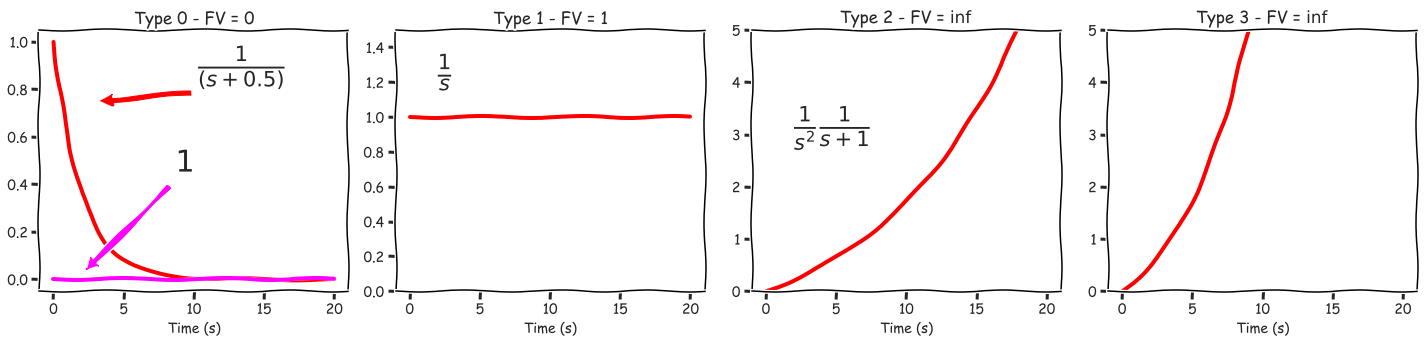

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

t = np.linspace(0, 20, 50)

axs[0].plot(t, np.exp(-.5*t), color='red', linewidth=4)
axs[0].annotate('$\\frac{1}{(s+0.5)}$', xy=(3, 0.75),  xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(color='red', facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            fontsize=30
            )

axs[0].plot(t, np.zeros(len(t)), color='magenta', linewidth=4)
axs[0].annotate('$1$', xy=(2, 0.02),  xycoords='data',
            xytext=(0.5, 0.55), textcoords='axes fraction',
            arrowprops=dict(color='magenta', facecolor='magenta', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            fontsize=30
            )
axs[0].set_xlabel('Time (s)')
axs[0].set_title('Type 0 - FV = 0')
axs[0].grid()



axs[1].plot(t, np.ones(len(t)), color='red', linewidth=4)
axs[1].text(2, 1.2, '$\\frac{1}{s}$', fontsize=30)
axs[1].set_ylim(0,1.5)
axs[1].set_xlabel('Time (s)')
axs[1].set_title('Type 1 - FV = 1')
axs[1].grid()


axs[2].plot(t, np.exp(+0.1*t)-1, color='red', linewidth=4)
axs[2].text(2, 3, '$\\frac{1}{s^2}\\frac{1}{s+1}$', fontsize=30)
axs[2].set_ylim(0,5)
axs[2].set_xlabel('Time (s)')
axs[2].set_title('Type 2 - FV = $\\inf$')
axs[2].grid()

axs[3].plot(t, np.exp(.2*t)-1, color='red', linewidth=4)
axs[3].set_ylim(0,5)
axs[3].set_xlabel('Time (s)')
axs[3].set_title('Type 3 - FV = $\\inf$')
axs[3].grid()



fig.tight_layout()
plt.savefig('img/56.types_response.png', bbox_inches='tight')

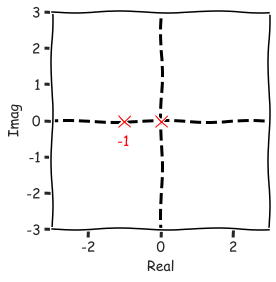

In [ ]:
fig = plt.figure()
        
# Axis
plt.plot([-10, 10], [0, 0], color='black', linewidth=3, linestyle='--')
plt.plot([0, 0], [-10, 10], color='black', linewidth=3, linestyle='--')

# K>0
plt.plot(0, 0, color='red', marker='x', markersize=12)
plt.plot(-1, 0, color='red', marker='x', markersize=12)
plt.text(-1.2, -0.7, '-1', fontweight='normal', color='red') #fontsize='small'



plt.xlabel('Real')
plt.ylabel('Imag')    
    
plt.axis([-3, 3, -3, 3])
plt.grid()
fig.gca().set_aspect('equal', 'box')

plt.savefig('img/57_example_1_poles', bbox_inches='tight')

%%html
<style>
    @media print { 
        * {
             box-sizing: border-box;
          }
        .row {
             display: flex;
         }
       /* Create two equal columns that sits next to each other */
       .column {
          flex: 50%;
          padding: 10px;
  
        }
        
        div.input {
          display: none;
          padding: 0;
        }
        div.output_prompt {
          display: none;
          padding: 0;
        }
        div.text_cell_render {
          padding: 1pt;
        }
        div#notebook p,
        div#notebook,
        div#notebook li,
        p {
          font-size: 10pt;
          line-height: 115%;
          margin: 0;
        }
        .rendered_html h1,
        .rendered_html h1:first-child {
          font-size: 10pt;
          margin: 3pt 0;
        }
       .rendered_html h2,
       .rendered_html h2:first-child {
          font-size: 10pt;
          margin: 3pt 0;
       }
       .rendered_html h3,
       .rendered_html h3:first-child {
         font-size: 10pt;
         margin: 3pt 0;
       }
       div.output_subarea {
         padding: 0;
       }
       div.input_prompt{
         display: none;
         padding: 0;
      }
}
       

<div class="row">
  <div class="column">
    Lorem ipsum dolor sit amet, consectetur adipiscing elit.    Maecenas quis nunc pulvinar urna faucibus tincidunt ut vestibulum ligula. Sed placerat sollicitudin erat, quis dapibus nibh tempor non. 
      <br/>
    
Id | Syntax      | Description 
--|:---------:|:-----------:
1|Header      | Something  here
2|More here   | Text
    
  </div>
    
  <div class="column">
Lorem ipsum dolor sit amet, consectetur adipiscing elit. Maecenas quis nunc pulvinar urna faucibus tincidunt ut vestibulum ligula. Sed placerat sollicitudin erat, quis dapibus nibh tempor non. 
  <br/>
    
  $$
  \begin{align}
  {x} & = \sigma(y-x) \tag{3-1}\\
  {y} & = \rho x - y - xz \tag{3-2}\\
  {x+y+z} & = -\beta z + xy \tag{3-3}
  \end{align}
  $$
    
  </div>
</div> 

In [ ]:
# <div style="clear: both;">g

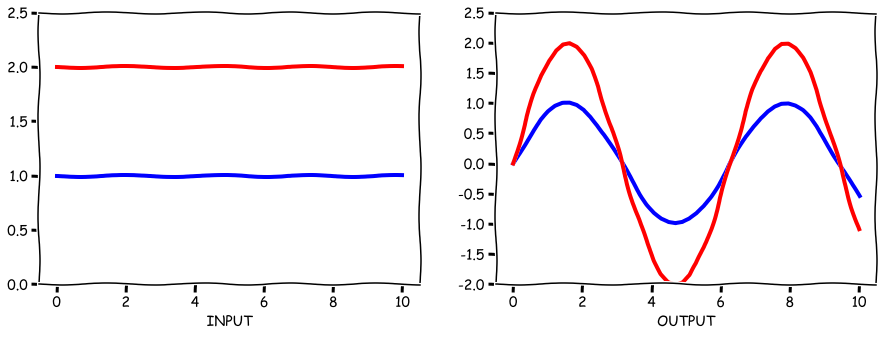

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

time = np.linspace(0, 10, 50)

axs[0].plot(time, np.ones(len(time)), color='blue', linewidth=4)
axs[1].plot(time, np.sin(1*time), color='blue', linewidth=4)

axs[0].plot(time, 2*np.ones(len(time)), color='red', linewidth=4)
axs[1].plot(time, 2*np.sin(1*time), color='red', linewidth=4)

axs[0].set_ylim(0, 2.5);
axs[1].set_ylim(-2, 2.5);
axs[0].set_xlabel('INPUT')
axs[1].set_xlabel('OUTPUT')

plt.savefig('img/15_1_LTI-homogeneity.png', bbox_inches='tight')